In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import missingno as msno 
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

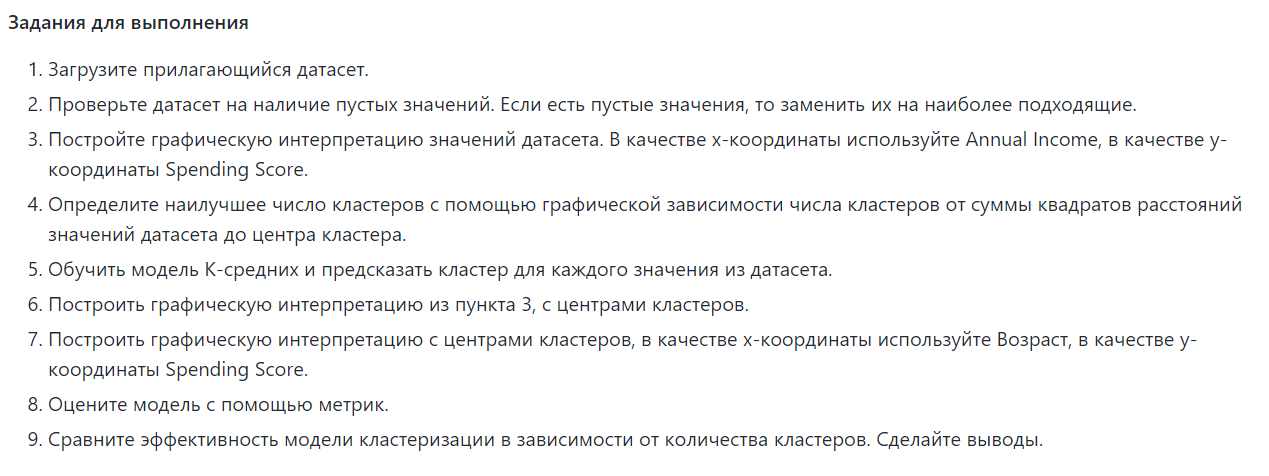

### В первую очередь загрузим датасет, выведем первые несколько строк:

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
df = pd.read_csv('Mall_Customers.csv',)
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


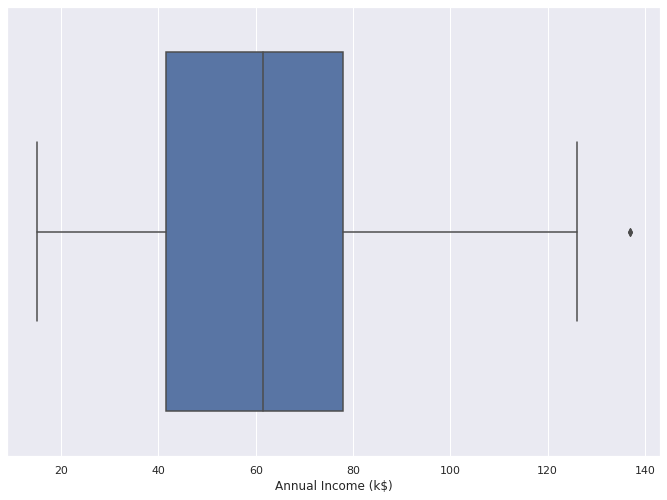

In [ ]:
sns.boxplot(
    data=df,
    x='Annual Income (k$)'
);

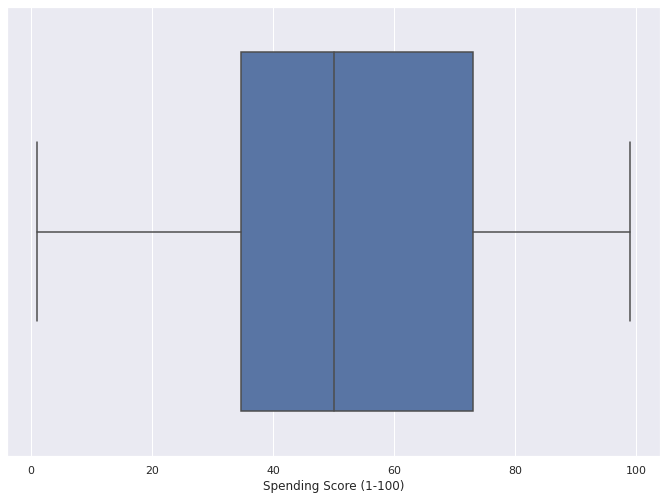

In [ ]:
sns.boxplot(
    data=df,
    x='Spending Score (1-100)'
);

Построим графическую интерпретацию значений датасета. В качестве x-координаты возьмем годовой доход, а в качестве y-координаты оценку трат.

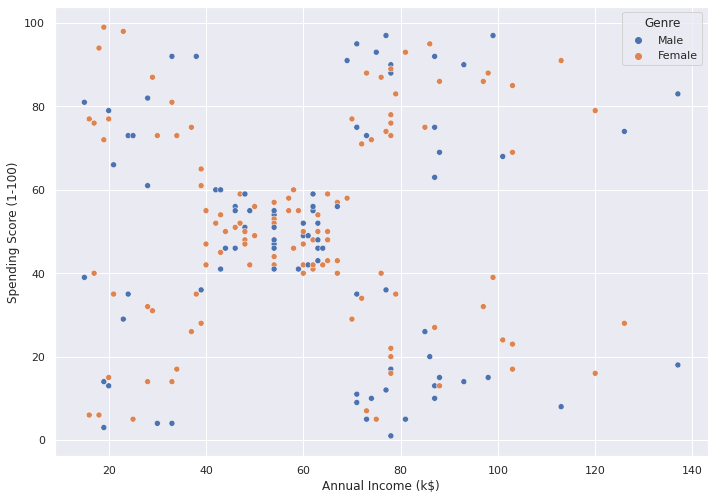

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)', data=df, hue='Genre')

По графику можно предположить оптимальное количество кластеров для хорошего описания массива.

Проверим наши предположения с помощью перебора количества кластеров. Для этого построим на графике взаимосвязь суммы квадратов расстояний значений датасета до центра кластера от количества кластеров.

In [ ]:
# df = pd.get_dummies(df, columns=['Genre'])
# X = df.values[:, 1:]
# X = np.nan_to_num(X)

X = pd.get_dummies(df)

Вычисляем среднее значение Silhouette Coefficient для всех семплов: 0.4793, при n_clusters=2
Вычисляем Calinski and Harabasz score для всех семплов: 300.9765, при n_clusters=2
Вычисляем среднее значение Silhouette Coefficient для всех семплов: 0.3766, при n_clusters=3
Вычисляем Calinski and Harabasz score для всех семплов: 255.5038, при n_clusters=3
Вычисляем среднее значение Silhouette Coefficient для всех семплов: 0.4224, при n_clusters=4
Вычисляем Calinski and Harabasz score для всех семплов: 260.769, при n_clusters=4
Вычисляем среднее значение Silhouette Coefficient для всех семплов: 0.423, при n_clusters=5
Вычисляем Calinski and Harabasz score для всех семплов: 253.7732, при n_clusters=5
Вычисляем среднее значение Silhouette Coefficient для всех семплов: 0.4094, при n_clusters=6
Вычисляем Calinski and Harabasz score для всех семплов: 269.7557, при n_clusters=6
Вычисляем среднее значение Silhouette Coefficient для всех семплов: 0.4036, при n_clusters=7
Вычисляем Calinski and Haraba

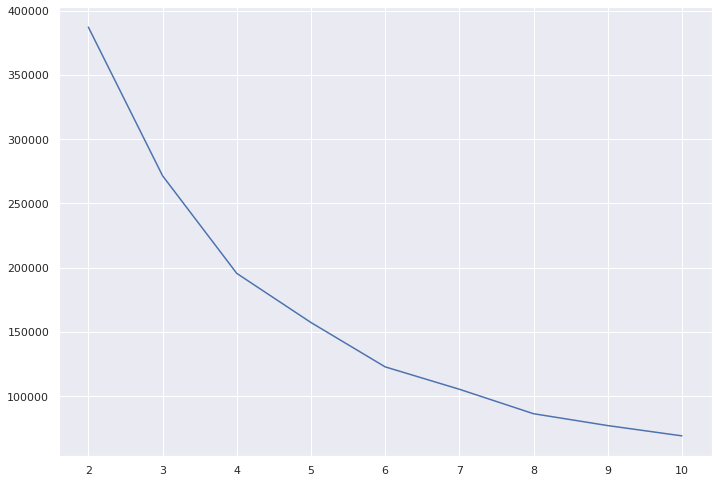

In [ ]:
wcss = []
for i in range(2,11):
	k_means = KMeans(n_clusters=i, random_state=42)
	k_means.fit(X)
	cluster_labels = k_means.fit_predict(X)
	wcss.append(k_means.inertia_)
	# Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера (a) и среднего расстояния до ближайшего кластера (b) для каждой выборки.
	print(f'Вычисляем среднее значение Silhouette Coefficient для всех семплов: {round(silhouette_score(X, cluster_labels),4)}, при n_clusters={i}')
	# Оценка определяется как отношение суммы межкластерной дисперсии и внутрикластерной дисперсии.
	print(f'Вычисляем Calinski and Harabasz score для всех семплов: {round(calinski_harabasz_score(X, cluster_labels),4)}, при n_clusters={i}')

plt.plot(range(2,11), wcss)
plt.xticks(range(2,11));

В качестве количества кластеров возьмем число 5. Создадим модель К-средних и обучим её.

Построим графическую интерпретацию данных с центрами кластеров.

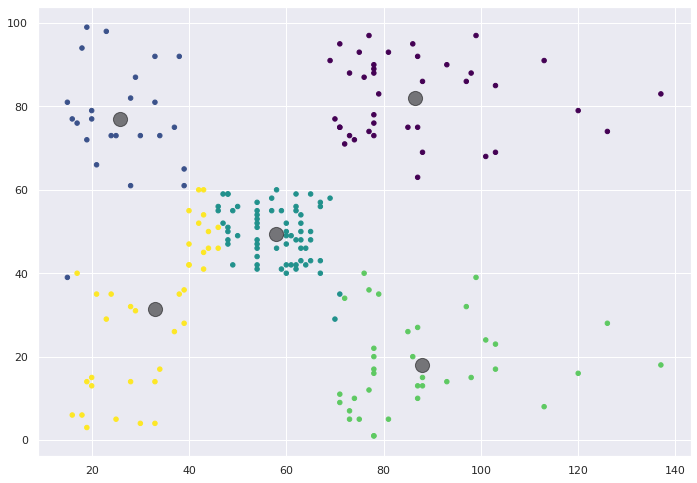

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=k_means.labels_, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5);

In [ ]:
centers

array([[162.        ,  32.69230769,  86.53846154,  82.12820513,
          0.53846154,   0.46153846],
       [ 23.04166667,  25.25      ,  25.83333333,  76.91666667,
          0.58333333,   0.41666667],
       [ 93.04615385,  42.96923077,  57.93846154,  49.44615385,
          0.56923077,   0.43076923],
       [164.        ,  40.80555556,  87.91666667,  17.88888889,
          0.47222222,   0.52777778],
       [ 35.47222222,  45.19444444,  32.94444444,  31.47222222,
          0.63888889,   0.36111111]])

### Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

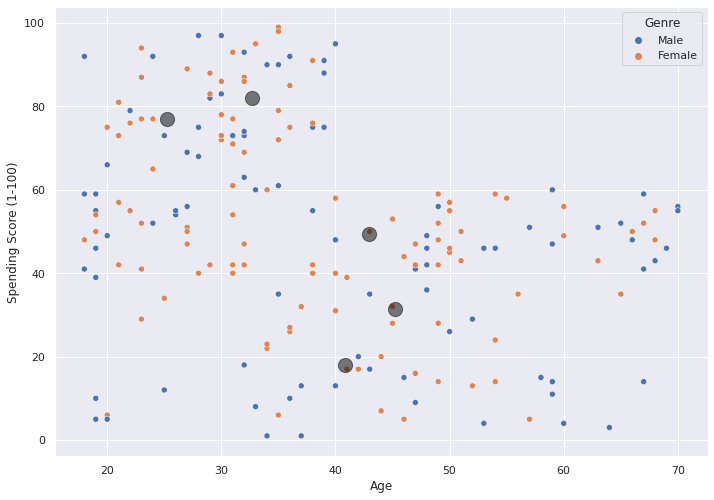

In [ ]:
sns.scatterplot(x='Age' , y = 'Spending Score (1-100)',data=df , hue='Genre');
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 3], c='black', s=200, alpha=0.5);